Football Injury Datasets

https://nflreadr.nflverse.com/reference/load_injuries.html

https://nflreadr.nflverse.com/reference/load_rosters.html

https://nflreadr.nflverse.com/reference/load_players.html

https://nflreadr.nflverse.com/reference/load_combine.html

https://nflreadr.nflverse.com/articles/dictionary_injuries.html

https://nflreadr.nflverse.com/articles/dictionary_rosters.html

https://nflreadr.nflverse.com/articles/dictionary_combine.html

In [42]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
years = list(range(2009, 2025))

combine_df = nfl.clean_nfl_data(nfl.import_combine_data(years=years))
rosters_df = nfl.clean_nfl_data(nfl.import_seasonal_rosters(years=years))
injuries_df = nfl.clean_nfl_data(nfl.import_injuries(years=years))

combine_df = combine_df.drop(columns=['season'])

In [86]:
valid_injury_types = [
    "knee", "ankle", "hamstring", "shoulder", "foot", "concussion",
    "groin", "back", "calf", "hip", "neck", "toe", "quadricep", "elbow",
    "hand", "rib", "wrist", "thumb", "abdomen", "head", "finger", "achilles",
    "shin", "pectoral", "forearm", "heel", "biceps", "fibula"
]

valid_pos_types = ['WR', 'LB', 'C', 'RB', 'CB', 'DT', 'TE', 'S', 'T', 'G', 'DE', 'P', 'LS', 'QB']

def extract_valid_injury(report):
    if pd.isna(report):
        return None
    report_lower = report.lower()
    for i, injury in enumerate(valid_injury_types):
        if injury in report_lower:
            return injury
    return None

def extract_injury_index(report):
    if pd.isna(report):
        return None
    return valid_injury_types.index(report)

def extract_pos_index(report):
    if pd.isna(report):
        return None
    return valid_pos_types.index(report)

roster_injury_df = pd.merge(
    rosters_df,
    injuries_df,
    left_on=['player_name', 'season', 'team', 'position'],
    right_on=['full_name', 'season', 'team', 'position'],
    how='left'
)

merged_df = pd.merge(
    roster_injury_df,
    combine_df,
    left_on=['player_name'],
    right_on=['player_name'],
    how='left'
)

merged_df = merged_df[['season', 'player_name', 'position', 'height', 'weight', 'age', 'report_primary_injury', 'forty', 'bench', 'vertical']]
merged_df["injury"] = merged_df["report_primary_injury"].apply(extract_valid_injury)
merged_df = merged_df.dropna()
merged_df = merged_df.drop(columns=['report_primary_injury'])

merged_df["injury_index"] = merged_df["injury"].apply(extract_injury_index).astype(int)
merged_df["position_index"] = merged_df["position"].apply(extract_pos_index).astype(int)

merged_df = merged_df.sort_values(by=['player_name', 'season'])
merged_df

for i, injury in enumerate(valid_injury_types):
    merged_df[f"prev_{injury}"] = 0
    merged_df[f"prev_{injury}"] = merged_df.groupby(['player_name']).apply(
        lambda group: (group['injury'] == injury).cumsum().shift(fill_value=0)
    ).reset_index(level=0, drop=True)

merged_df.to_csv("data.csv", index=False)
merged_df

,season,player_name,position,height,weight,age,forty,bench,vertical,injury,...,prev_abdomen,prev_head,prev_finger,prev_achilles,prev_shin,prev_pectoral,prev_forearm,prev_heel,prev_biceps,prev_fibula
54426,2020,A.J. Brown,WR,72.0,226.0,23.0,4.49,19.0,36.5,knee,...,0,0,0,0,0,0,0,0,0,0
54427,2020,A.J. Brown,WR,72.0,226.0,23.0,4.49,19.0,36.5,knee,...,0,0,0,0,0,0,0,0,0,0
54428,2020,A.J. Brown,WR,72.0,226.0,23.0,4.49,19.0,36.5,knee,...,0,0,0,0,0,0,0,0,0,0
58817,2021,A.J. Brown,WR,73.0,226.0,24.0,4.49,19.0,36.5,hamstring,...,0,0,0,0,0,0,0,0,0,0
58822,2021,A.J. Brown,WR,73.0,226.0,24.0,4.49,19.0,36.5,knee,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66332,2023,Zay Jones,WR,74.0,200.0,28.0,4.45,15.0,36.5,knee,...,0,0,0,0,0,0,0,0,0,0
66333,2023,Zay Jones,WR,74.0,200.0,28.0,4.45,15.0,36.5,knee,...,0,0,0,0,0,0,0,0,0,0
66336,2023,Zay Jones,WR,74.0,200.0,28.0,4.45,15.0,36.5,knee,...,0,0,0,0,0,0,0,0,0,0
66337,2023,Zay Jones,WR,74.0,200.0,28.0,4.45,15.0,36.5,knee,...,0,0,0,0,0,0,0,0,0,0


In [83]:
merged_df['position'].unique()

array(['WR', 'LB', 'C', 'RB', 'CB', 'DT', 'TE', 'S', 'T', 'G', 'DE', 'P',
       'LS', 'QB'], dtype=object)

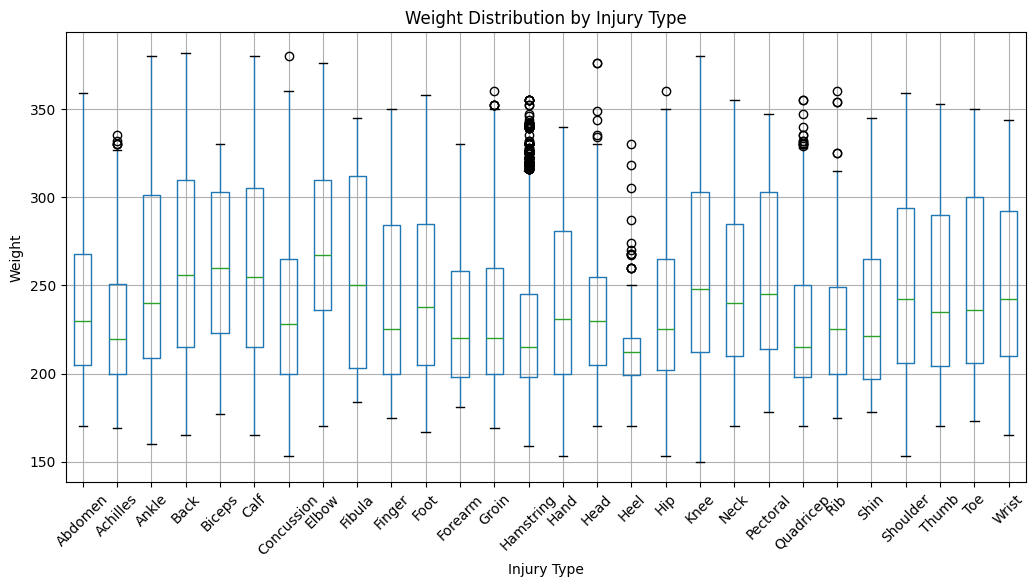

In [46]:
injury_reports.boxplot(column='weight', by='report_primary_injury', figsize=(12, 6))
plt.title('Weight Distribution by Injury Type')
plt.suptitle('')  # Removes the default subtitle
plt.xlabel('Injury Type')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.show()

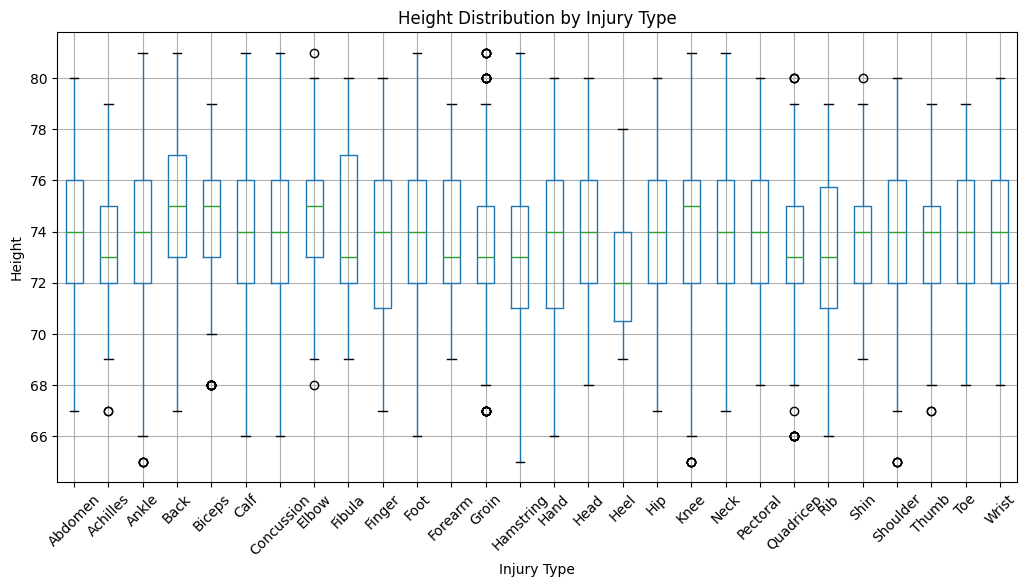

In [47]:
injury_reports.boxplot(column='height', by='report_primary_injury', figsize=(12, 6))
plt.title('Height Distribution by Injury Type')
plt.suptitle('')  # Removes the default subtitle
plt.xlabel('Injury Type')
plt.ylabel('Height')
plt.xticks(rotation=45)
plt.show()

In [48]:
import scipy.stats as stats

injury_types = injury_reports['report_primary_injury'].unique()

groups_age = [injury_reports[injury_reports['report_primary_injury'] == injury]['age'] for injury in injury_types]

f_stat_age, p_value_age = stats.f_oneway(*groups_age)
print("ANOVA results for age: F-statistic =", f_stat_age, ", p-value =", p_value_age)

ANOVA results for age: F-statistic = 25.562877601860148 , p-value = 3.423824477163067e-127


In [49]:
injury_reports.columns

Index(['season', 'age', 'height', 'weight', 'report_primary_injury'], dtype='object')